## U shape PHP dynamics with multiple liquid slugs - with heat transfer

## $\frac{\partial \theta }{\partial \mathcal{T}} = \nabla^2 \theta$

In [1]:
@time using Plots
pyplot()

 32.721959 seconds (19.66 M allocations: 1.104 GiB, 5.84% gc time)


Plots.PyPlotBackend()

In [2]:
@time using DifferentialEquations

 83.297978 seconds (53.94 M allocations: 3.103 GiB, 2.40% gc time)


In [45]:
cd(dirname(pwd()))
cd("src") 


include("Systems.jl")
using ..Systems

include("Tools.jl")
using ..Tools


include("Thermomodel.jl")
using ..Thermomodel

include("Postprocessing.jl")
using ..Postprocessing

include("Boiling.jl")
using ..Boiling

cd(dirname(pwd()))
cd("src") 

## Parameters of the PHP

In [46]:
    ω0 = [sqrt(1.2e004)];
    ℘ = [1.2e005];

    θinitial=1.0
    θ  = 0.15;
    θe = 1 + θ;
    θc = 1 - θ;
    
    He = 3000.0;
    Hc = 3000.0;
    Hₗ =  3000.0; # liquid wall heat transfer coeffcient

    
    X0 = 0.5;

    γ = 1.4;

In [47]:
    
    d = 1/30 # dimensionless diameter
    L = 8.0  # total length of the pipe when streched to a 1D pipe
    L2D = 2.0 # the actual length of the bended pipe in the real world
    angle = pi/2 # inclination angle 


1.5707963267948966

## Pipe definition

In [48]:
tube = Tube(d,L,L2D,angle)

Tube(0.03333333333333333, 8.0, 2.0, 1.5707963267948966)

## Evaporator and condenser definition

In [49]:
Xe = map(tuple, [0.0; 3.0; 7.0], [1.0; 5.0; 8.0])
evap = Evaporator(He,θe,Xe)

Evaporator(3000.0, 1.15, [(0.0, 1.0), (3.0, 5.0), (7.0, 8.0)])

In [50]:
Xc = map(tuple, [1.0; 5.0], [3.0; 7.0])
cond = Condenser(Hc,θc,Xc)

Condenser(3000.0, 0.85, [(1.0, 3.0), (5.0, 7.0)])

## Vapor plug and liquid slug initialization

In [51]:
N=1000
X0 = [(0.5,2.5),(5.0,7.0)]
dXdt0 = [(0.0,0.0),(0.0,0.0)]
ρₗ = 1000
Xarrays,θarrays = constructXarrays(X0,N,θinitial,L)
liquids=Liquid(γ,Hₗ,ρₗ,ω0,℘,X0,dXdt0,Xarrays,θarrays)

Liquid(1.4, 3000.0, 1000.0, [109.54451150103323], [120000.0], [(0.5, 2.5), (5.0, 7.0)], [(0.0, 0.0), (0.0, 0.0)], [[0.5, 0.5080321285140562, 0.5160642570281124, 0.5240963855421686, 0.5321285140562249, 0.5401606425702812, 0.5481927710843374, 0.5562248995983936, 0.5642570281124498, 0.572289156626506  …  2.427710843373494, 2.4357429718875503, 2.4437751004016066, 2.4518072289156625, 2.459839357429719, 2.467871485943775, 2.4759036144578315, 2.4839357429718874, 2.4919678714859437, 2.5], [5.0, 5.008032128514056, 5.016064257028113, 5.024096385542169, 5.032128514056225, 5.040160642570281, 5.048192771084337, 5.056224899598393, 5.06425702811245, 5.072289156626506  …  6.927710843373494, 6.93574297188755, 6.943775100401607, 6.951807228915663, 6.959839357429719, 6.967871485943775, 6.975903614457831, 6.983935742971887, 6.991967871485944, 7.0]], [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …

In [52]:
P = [1.0,1.0,1.0];
δ = 0.05*P;
vapors=Vapor(γ,P,δ)

Vapor(1.4, [1.0, 1.0, 1.0], [0.05, 0.05, 0.05])

In [53]:
α = 1 # nondimensional thermal diffusivity = (αₐ d^2) / (νₗ height^2)
Xwallarray,θwallarray = constructXarrays(L,N,θinitial)

wall = Wall(α,Xwallarray,θwallarray)

Wall(1.0, [0.0, 0.008008008008008008, 0.016016016016016016, 0.024024024024024024, 0.03203203203203203, 0.04004004004004004, 0.04804804804804805, 0.056056056056056056, 0.06406406406406406, 0.07207207207207207  …  7.927927927927928, 7.935935935935936, 7.943943943943944, 7.951951951951952, 7.95995995995996, 7.967967967967968, 7.975975975975976, 7.983983983983984, 7.991991991991992, 8.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

In [54]:
# struct Mapping
#     walltoliquid::Array{Tuple{Int64,Int64},1}
#     liquidtowall::Array{Array{Int64,1},1}
# end

In [55]:
walltoliquid, liquidtowall = constructmapping(Xarrays,Xwallarray)
mapping = Mapping(walltoliquid,liquidtowall)

Mapping([(1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1)  …  (3, -1), (3, -1), (3, -1), (3, -1), (3, -1), (3, -1), (3, -1), (3, -1), (3, -1), (3, -1)], [[64, 65, 66, 67, 68, 69, 70, 71, 72, 73  …  305, 306, 307, 308, 309, 310, 311, 312, 313, 314], [626, 627, 628, 629, 630, 631, 632, 633, 634, 635  …  867, 868, 869, 870, 871, 872, 873, 874, 875, 876]])

## Construct the system

In [56]:
sys0 = PHPSystem(tube,evap,cond,liquids,vapors,wall,mapping)

PHPSystem(Tube(0.03333333333333333, 8.0, 2.0, 1.5707963267948966), Evaporator(3000.0, 1.15, [(0.0, 1.0), (3.0, 5.0), (7.0, 8.0)]), Condenser(3000.0, 0.85, [(1.0, 3.0), (5.0, 7.0)]), Liquid(1.4, 3000.0, 1000.0, [109.54451150103323], [120000.0], [(0.5, 2.5), (5.0, 7.0)], [(0.0, 0.0), (0.0, 0.0)], [[0.5, 0.5080321285140562, 0.5160642570281124, 0.5240963855421686, 0.5321285140562249, 0.5401606425702812, 0.5481927710843374, 0.5562248995983936, 0.5642570281124498, 0.572289156626506  …  2.427710843373494, 2.4357429718875503, 2.4437751004016066, 2.4518072289156625, 2.459839357429719, 2.467871485943775, 2.4759036144578315, 2.4839357429718874, 2.4919678714859437, 2.5], [5.0, 5.008032128514056, 5.016064257028113, 5.024096385542169, 5.032128514056225, 5.040160642570281, 5.048192771084337, 5.056224899598393, 5.06425702811245, 5.072289156626506  …  6.927710843373494, 6.93574297188755, 6.943775100401607, 6.951807228915663, 6.959839357429719, 6.967871485943775, 6.975903614457831, 6.983935742971887, 6.

In [57]:
typeof(sys0)

PHPSystem

## Construct U for wall heat function

## construct state vector U

In [58]:
vectoXMδ(XMδtovec(X0,dXdt0,M,δ))

LoadError: [91mUndefVarError: vectoXMδ not defined[39m

In [59]:
sys0.wall.θarray = settemperature!.(sys0.wall.θarray,sys0.wall.Xarray,[sys0]);

In [60]:
Lvaporplug = XptoLvaporplug(X0,sys0.tube.L)
M = P.^(1/γ).* Lvaporplug


u=[XMδtovec(X0,dXdt0,M,δ); wallθtovec(sys0.wall.θarray); liquidθtovec(sys0.liquid.θarrays)];

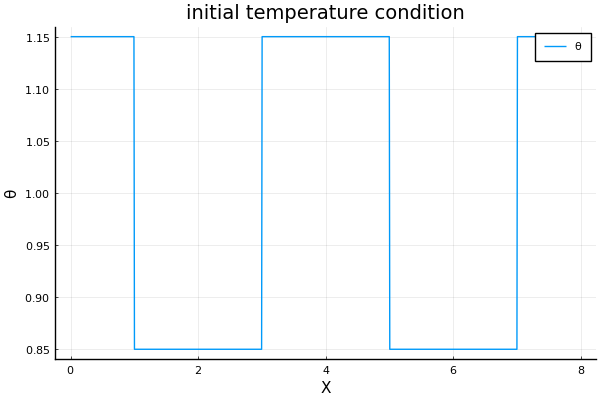

In [61]:
plot([sys0.wall.Xarray],[sys0.wall.θarray], title="initial temperature condition", labels = "θ", xlabel="X", ylabel="θ")

## Solve the constructed ODE for U

### propagation function

In [62]:
function dfdt(u,p,t)
    
        p = deepcopy(getcurrentsys(u,p))
    
        indexes = Int64[]
        θliquidtemp = Array[]

        for i = 1:length(u)
            if abs(u[i]+1e10) <= 10^(-1)
                push!(indexes,i)
            end
        end
    

    dynamicsdu = dynamicsmodel(u[1:indexes[1]-1],p)
    
    
    
    duwalltemp = wallmodel(u[indexes[1]+1:indexes[2]-1],p)
    walldu = duwallθtovec(duwalltemp)
    
    
    
    for i = 1:length(indexes)-2
    push!(θliquidtemp, u[indexes[i+1]+1:indexes[i+2]-1])
    end
    push!(θliquidtemp, u[indexes[end]+1:end])
    duliquidtemp = zero.(deepcopy(θliquidtemp))
    duliquidtemp = liquidmodel(θliquidtemp,p)
    liquiddu = duliquidθtovec(duliquidtemp)
    
    du = [dynamicsdu;walldu;liquiddu]

    return(du)

end

dfdt (generic function with 1 method)

### condition

In [63]:
# function condition(u,t,integrator)
#     return (integrator.t > 0.1)
# end

### affect! (with boundary conditions)

In [64]:
p

PHPSystem(Tube(0.03333333333333333, 8.0, 2.0, 1.5707963267948966), Evaporator(3000.0, 1.15, [(0.0, 1.0), (3.0, 5.0), (7.0, 8.0)]), Condenser(3000.0, 0.85, [(1.0, 3.0), (5.0, 7.0)]), Liquid(1.4, 3000.0, 1000.0, [109.54451150103323], [120000.0], [(0.5, 2.5), (5.0, 7.0)], [(0.0, 0.0), (0.0, 0.0)], [[0.5, 0.5080321285140562, 0.5160642570281124, 0.5240963855421686, 0.5321285140562249, 0.5401606425702812, 0.5481927710843374, 0.5562248995983936, 0.5642570281124498, 0.572289156626506  …  2.427710843373494, 2.4357429718875503, 2.4437751004016066, 2.4518072289156625, 2.459839357429719, 2.467871485943775, 2.4759036144578315, 2.4839357429718874, 2.4919678714859437, 2.5], [5.0, 5.008032128514056, 5.016064257028113, 5.024096385542169, 5.032128514056225, 5.040160642570281, 5.048192771084337, 5.056224899598393, 5.06425702811245, 5.072289156626506  …  6.927710843373494, 6.93574297188755, 6.943775100401607, 6.951807228915663, 6.959839357429719, 6.967871485943775, 6.975903614457831, 6.983935742971887, 6.

In [65]:
function affect!(integrator)
    
    p = deepcopy(getcurrentsys(integrator.u,integrator.p))
    
    p = nucleateboiling(p,(1.2,1.4),1.0)
    
    Lvaporplug = XptoLvaporplug(p.liquid.Xp,p.tube.L)
    M = p.vapor.P.^(1/p.vapor.γ).* Lvaporplug
    
    unew=[XMδtovec(p.liquid.Xp,p.liquid.dXdt,M,p.vapor.δ); wallθtovec(p.wall.θarray); liquidθtovec(p.liquid.θarrays)];
        
#     set_u!(integrator,  unew)
    resize!(integrator.u,length(unew))
    integrator.u = deepcopy(unew)
    

end

affect! (generic function with 1 method)

In [66]:
cb =  PresetTimeCallback(0.1,affect!)

DiscreteCallback{DiffEqCallbacks.var"#61#64"{Float64},DiffEqCallbacks.var"#62#65"{typeof(affect!)},DiffEqCallbacks.var"#63#66"{typeof(DiffEqBase.INITIALIZE_DEFAULT),Bool,Float64,typeof(affect!)},typeof(DiffEqBase.FINALIZE_DEFAULT)}(DiffEqCallbacks.var"#61#64"{Float64}(0.1), DiffEqCallbacks.var"#62#65"{typeof(affect!)}(affect!), DiffEqCallbacks.var"#63#66"{typeof(DiffEqBase.INITIALIZE_DEFAULT),Bool,Float64,typeof(affect!)}(DiffEqBase.INITIALIZE_DEFAULT, true, 0.1, affect!), DiffEqBase.FINALIZE_DEFAULT, Bool[1, 1])

In [67]:
tstep=4e-5

p = sys0
tspan = (0.0, 0.2);
prob = ODEProblem(dfdt, u, tspan, p)

integrator = init(prob, RK4(), adaptive=false, dt=tstep);


# sol = solve(prob, RK4(), adaptive=false, dt=tstep);
sol = solve(prob, RK4(), adaptive=false,dt=tstep,callback=cb);

LoadError: [91mMethodError: [0mCannot `convert` an object of type [92mMain.Systems.Mapping[39m[0m to an object of type [91mMapping[39m[39m
[91m[0mClosest candidates are:[39m
[91m[0m  convert(::Type{T}, [91m::T[39m) where T at essentials.jl:171[39m
[91m[0m  Mapping(::Any, [91m::Any[39m) at C:\Users\liyux\github\OneDThermalFlow\src\Systems.jl:151[39m

In [68]:
sol[end]

LoadError: [91mUndefVarError: sol not defined[39m

In [69]:
constructmapping(Xarrays,Xwallarray)

([(1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1)  …  (3, -1), (3, -1), (3, -1), (3, -1), (3, -1), (3, -1), (3, -1), (3, -1), (3, -1), (3, -1)], [[64, 65, 66, 67, 68, 69, 70, 71, 72, 73  …  305, 306, 307, 308, 309, 310, 311, 312, 313, 314], [626, 627, 628, 629, 630, 631, 632, 633, 634, 635  …  867, 868, 869, 870, 871, 872, 873, 874, 875, 876]])

In [70]:
sysfinal = getcurrentsys.(sol.u,[sys0])

LoadError: [91mUndefVarError: sol not defined[39m

In [71]:
sysfinal[end].liquid.Xarrays

LoadError: [91mUndefVarError: sysfinal not defined[39m

In [72]:
result1=soltoMatrxResult(sol,sys0);

LoadError: [91mUndefVarError: sol not defined[39m

In [73]:
@gif for i=1:size(sol,2)
plot([x],[sol[i][13:1012]], labels = "θ", xlabel="X", ylabel="θ", title=("dimensionless temperature along the wall"), ylim=(0.85,1.15))
    vline!([0,1,3,5,7,8], color = [:red])
    end every 50

LoadError: [91mUndefVarError: sol not defined[39m

In [74]:
@gif for i=1:size(sol,2)
plot([sysfinal[i].liquid.Xarrays[1]],[sysfinal[i].liquid.θarrays[1]], labels = "θ", xlabel="X", ylabel="θ", title=("dimensionless temperature along liquid 1"),xlim=(0,8), ylim=(0.9,1.1))
plot!([sysfinal[i].liquid.Xarrays[2]],[sysfinal[i].liquid.θarrays[2]], labels = "θ", xlabel="X", ylabel="θ", title=("dimensionless temperature along liquid 1"),xlim=(0,8), ylim=(0.9,1.1))
    if i >2502
        plot!([sysfinal[i].liquid.Xarrays[3]],[sysfinal[i].liquid.θarrays[3]], labels = "θ", xlabel="X", ylabel="θ", title=("dimensionless temperature along liquid 1"),xlim=(0,8), ylim=(0.9,1.1))
    end
    end every 50

LoadError: [91mUndefVarError: sol not defined[39m

In [75]:
# MatrxXp, MatrxdXdt, MatrxM, Matrxδ=soltoMatrxResult(sol[1:2502],sys0);

# ΔMatrxXp = zeros(size(MatrxXp,1)+1,size(MatrxXp,2))
# ΔMatrxXp[1,:] = MatrxXp[1,:]
# ΔMatrxXp[end,:] .= sys0.tube.L .- MatrxXp[end,:]
# for i = 2:size(MatrxXp,1)
#     ΔMatrxXp[i,:] = MatrxXp[i,:]-MatrxXp[i-1,:]
# end

# MatrxXp

In [76]:
MatrxXp1, MatrxdXdt1, MatrxM1, Matrxδ1=soltoMatrxResult(sol[1:2502],sys0);

ΔMatrxXp1 = zeros(size(MatrxXp1,1)+1,size(MatrxXp1,2))
ΔMatrxXp1[1,:] = MatrxXp1[1,:]
ΔMatrxXp1[end,:] .= sys0.tube.L .- MatrxXp1[end,:]
for i = 2:size(MatrxXp1,1)
    ΔMatrxXp1[i,:] = MatrxXp1[i,:]-MatrxXp1[i-1,:]
end

ΔMatrxXp1

LoadError: [91mUndefVarError: sol not defined[39m

In [77]:
MatrxXp2, MatrxdXdt2, MatrxM2, Matrxδ2=soltoMatrxResult(sol[2503:end],sys0);

ΔMatrxXp2 = zeros(size(MatrxXp2,1)+1,size(MatrxXp2,2))
ΔMatrxXp2[1,:] = MatrxXp2[1,:]
ΔMatrxXp2[end,:] .= sys0.tube.L .- MatrxXp2[end,:]
for i = 2:size(MatrxXp2,1)
    ΔMatrxXp2[i,:] = MatrxXp2[i,:]-MatrxXp2[i-1,:]
end

ΔMatrxXp2

LoadError: [91mUndefVarError: sol not defined[39m

In [78]:
MatrxXp1

LoadError: [91mUndefVarError: MatrxXp1 not defined[39m

In [79]:
MatrxXp2

LoadError: [91mUndefVarError: MatrxXp2 not defined[39m

In [80]:
length(sol.t[2503:end])

LoadError: [91mUndefVarError: sol not defined[39m

In [81]:
portfoliocomposition(ΔMatrxXp1', sol.t[1:2502], legend = :outertopleft, color = [:lightgrey :blue],ylabel="t", xlabel="X", labels = ["vapor bubble" "liquid slug"])
portfoliocomposition!(ΔMatrxXp2',sol.t[2503:end], color = [:lightgrey :blue])
vline!([0,1,3,5,7,8], color = [:red])

LoadError: [91mUndefVarError: ΔMatrxXp1 not defined[39m

In [82]:
# portfoliocomposition(MatrxM', sol.t, legend = :outertopleft, labels = ("mass of vapor bubble"), ylabel="t", xlabel="mass")

In [83]:
# result1 = soltoResult(sol[1:11,:],sys0)
# plot(sol.t, result1.θ[1], title="temperatures for three vapor bubbles")
# plot!(sol.t, result1.θ[2])
# plot!(sol.t, result1.θ[3])

In [84]:
Xpvapornew = (1.5,1.6)
Pvapornew = 1.1

1.1

In [85]:
sysnew = nucleateboiling(sys0,Xpvapornew,Pvapornew)

LoadError: [91mMethodError: [0mCannot `convert` an object of type [92mMain.Systems.Mapping[39m[0m to an object of type [91mMapping[39m[39m
[91m[0mClosest candidates are:[39m
[91m[0m  convert(::Type{T}, [91m::T[39m) where T at essentials.jl:171[39m
[91m[0m  Mapping(::Any, [91m::Any[39m) at C:\Users\liyux\github\OneDThermalFlow\src\Systems.jl:151[39m

In [86]:
sys0.vapor.δ

3-element Array{Float64,1}:
 0.05
 0.05
 0.05